In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv("C://Users//Admin//Desktop//Predicting Fuel Economy//Automotive+Fuel+Economy//auto-mpg.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


All columns are in the correct data types except for the 'horsepower' column, which is formatted as an object. Let's change its data type to float.And we need to change the data tpye of origin to objects.

In [5]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].dtypes

dtype('float64')

In [6]:
df['origin'] = df['origin'].astype('object')
df['origin'].dtypes

dtype('O')

In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


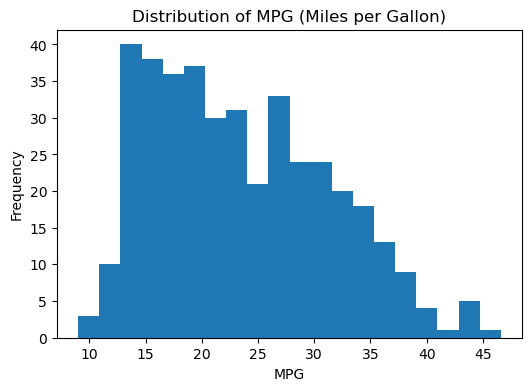

In [8]:
plt.figure(figsize=(6, 4))
plt.hist(df['mpg'], bins=20)
plt.title('Distribution of MPG (Miles per Gallon)')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19352\3419198418.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax1 = sns.heatmap(df.corr(), cbar=0,annot=True, cmap='crest')


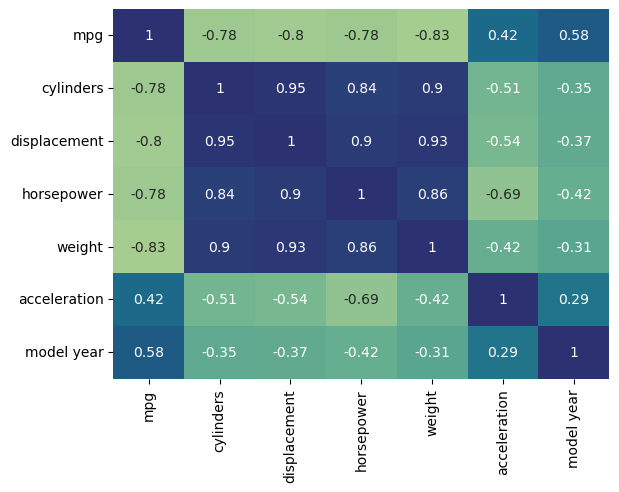

In [9]:
ax1 = sns.heatmap(df.corr(), cbar=0,annot=True, cmap='crest')
plt.show()

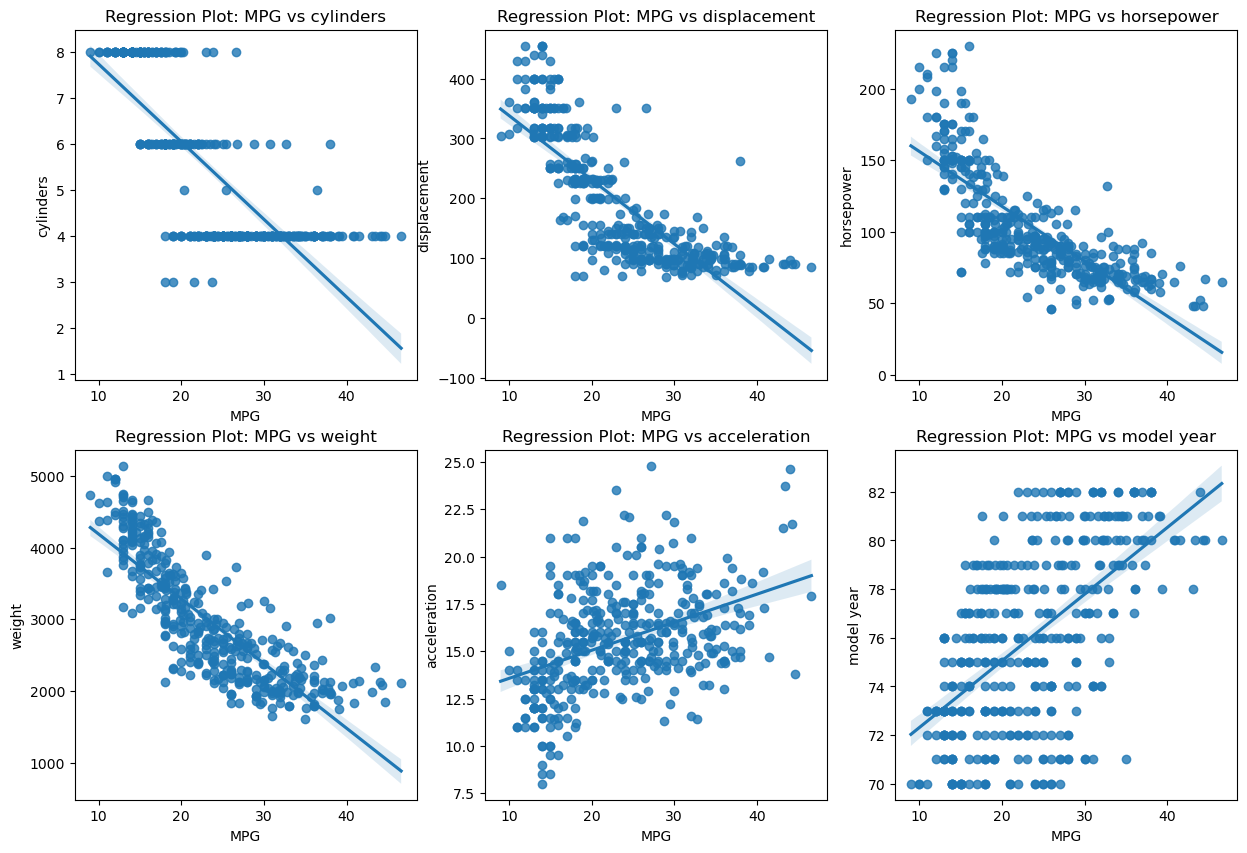

In [10]:
# numeric_columns = df.select_dtypes(include='number').drop("mpg")
numeric_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year']
# Create a 3x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten() 
for i, col in enumerate(numeric_columns):
    sns.regplot(x=df['mpg'], y=df[col], ax=axes[i])
    axes[i].set_title(f'Regression Plot: MPG vs {col}')
    axes[i].set_xlabel('MPG')
    axes[i].set_ylabel(col)

# Split the data and build a regression model

1.We found that 'weight' has the strongest correlation with 'mpg', Let's split the dataset into training and testing sets.</br>
2.Create a simple regression model using weight to predict 'mpg'.</br>
3.Build a multiple linear regression model by selecting important features and making necessary adjustments to improve performance.

In [11]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mne
import statsmodels.api as sm

features = ["weight"]
X = sm.add_constant(df[features])  # Adding a constant term for the intercept
y = df["mpg"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)


In [12]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
import statsmodels.api as sm

kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Create lists to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    
    # Fit the model on the fold's training data
    model = sm.OLS(y_train, X_train).fit()
    
    # Append validation scores to lists
    cv_lm_r2s.append(r2(y_val, model.predict(X_val)))
    cv_lm_mae.append(mae(y_val, model.predict(X_val)))

# Print the results
print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} ± {round(np.std(cv_lm_r2s), 3)}")
print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} ± {round(np.std(cv_lm_mae), 3)}")


All Validation R2s:  [0.663, 0.684, 0.641, 0.714, 0.722]
Cross Val R2s: 0.685 ± 0.031
All Validation MAEs:  [3.175, 3.355, 3.688, 3.317, 3.036]
Cross Val MAEs: 3.314 ± 0.218


In [13]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def residual_analysis_plots(model):
    # Get predictions and residuals from the model
    predictions = model.predict()
    residuals = model.resid

    # Create subplots for residual plot and Q-Q plot
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
    
    # Scatter plot: Residuals vs Predictions
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Predictions")
    ax[0].set_ylabel("Residuals")
    
    # Q-Q plot for normality of residuals
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")
    
    # Show the plots
    plt.tight_layout()
    plt.show()


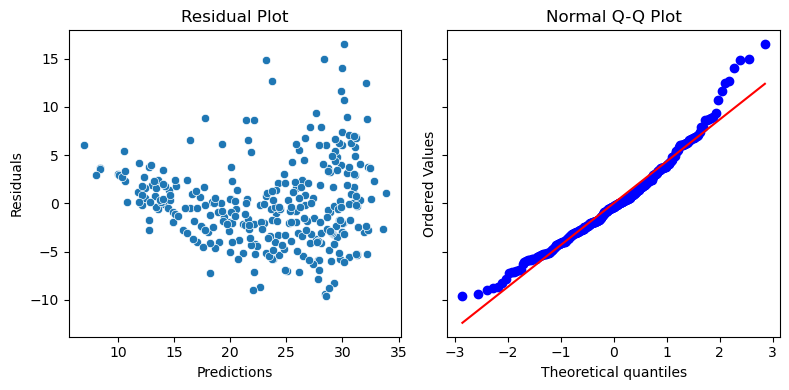

In [14]:
residual_analysis_plots(model)

Since we observe that the data is distributed quadratically and shows a curved pattern,so let’s make our feature stronger by squaring it. Then, we’ll check if this helps our model perform better.

In [15]:
mpg = df.assign(weight2=df["weight"] ** 2)

# Dropping the 'car name' column
mpg_model = mpg.drop("car name", axis=1)

# Creating dummy variables for categorical columns in the DataFrame
mpg_model = pd.get_dummies(mpg_model,drop_first = True)
# mpg_model.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19352\1700199890.py:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  mpg_model = pd.get_dummies(mpg_model,drop_first = True)


In [16]:
features = [
    "weight",
    "weight2",
#     "cylinders" ,
#     "displacement", 
#     "horsepower",
#     "acceleration",
    "model year",
    "origin_2",
    "origin_3"]
X = sm.add_constant(mpg_model[features])
y = mpg_model["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=2023)

cv_lm_r2s = []
cv_lm_mae = []

for train_ind, val_ind in kf.split(X, y):
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    
    model = sm.OLS(y_train, X_train).fit()
    
    cv_lm_r2s.append(r2(y_val, model.predict(X_val)))
    cv_lm_mae.append(mae(y_val, model.predict(X_val)))

print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} ± {round(np.std(cv_lm_r2s), 3)}")
print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} ± {round(np.std(cv_lm_mae), 3)}")


All Validation R2s:  [0.809, 0.851, 0.835, 0.884, 0.855]
Cross Val R2s: 0.847 ± 0.025
All Validation MAEs:  [2.266, 2.27, 2.249, 2.033, 2.249]
Cross Val MAEs: 2.214 ± 0.091


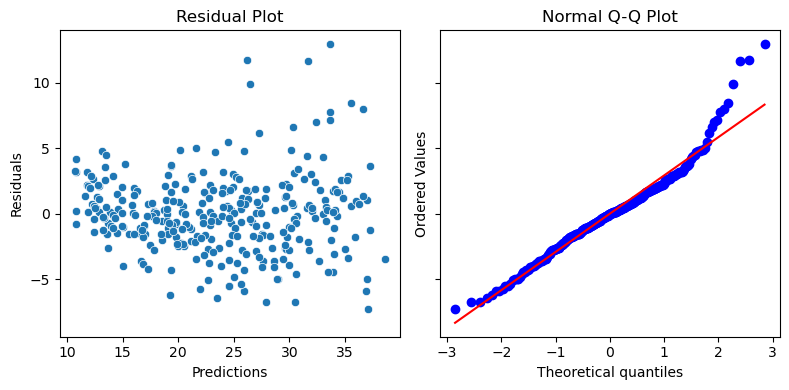

In [18]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def residual_analysis_plots(model):
    # Get predictions and residuals from the model
    predictions = model.predict()
    residuals = model.resid

    # Create subplots for residual plot and Q-Q plot
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
    
    # Scatter plot: Residuals vs Predictions
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Predictions")
    ax[0].set_ylabel("Residuals")
    
    # Q-Q plot for normality of residuals
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")
    
    # Show the plots
    plt.tight_layout()
    plt.show()
residual_analysis_plots(model)

In [19]:
# Print the R-squared and MAE scores on the set for linear regression
print(f"Test R2: {r2(y_val, model.predict(X_val))}")
print(f"Test MAE: {mae(y_val, model.predict(X_val))}")


Test R2: 0.8545668284082886
Test MAE: 2.2494119329697613


In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     369.2
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          6.51e-129
Time:                        20:19:47   Log-Likelihood:                -799.57
No. Observations:                 319   AIC:                             1611.
Df Residuals:                     313   BIC:                             1634.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4243      4.436     -0.546      0.585     -11.153       6.304
weight        -0.0203      0.002    -11.955      0.000      -0.024      -0.017
weight2     2.227e-06   2.57e-07      8.657      0.000    1.72e-06    2.73e-06
model year     0.8493      0.049     17.311      0.000       0.753       0.946
origin_2       1.5000      0.517      2.899      0.004       0.482       2.518
origin_3       1.0714      0.538      1.993      0.047       0.014       2.129
==============================================================================
Omnibus:                       46.800   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.677
Skew:                           0.740   Prob(JB):                     1.86e-23
Kurtosis:                       5.384   Cond. No.                     2.90e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     462.4
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          6.79e-162
Time:                        20:23:38   Log-Likelihood:                -998.29
No. Observations:                 398   AIC:                             2009.
Df Residuals:                     392   BIC:                             2032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1692      3.956     -0.296      0.768      -8.947       6.608
weight        -0.0206      0.002    -13.593      0.000      -0.024      -0.018
weight2     2.252e-06    2.3e-07      9.806      0.000     1.8e-06     2.7e-06
model year     0.8395      0.044     19.229      0.000       0.754       0.925
origin_2       1.4576      0.463      3.145      0.002       0.547       2.369
origin_3       0.9146      0.482      1.899      0.058      -0.032       1.861
==============================================================================
Omnibus:                       52.365   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.456
Skew:                           0.678   Prob(JB):                     4.23e-27
Kurtosis:                       5.342   Cond. No.                     2.90e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h2>Summary of the Project</h2>


In this project, we developed a linear regression model to predict fuel economy (mpg) using various features. Our final model achieved an R-squared value of 0.85, indicating that about 85% of the variability in mpg can be explained by the model. The Mean Absolute Error (MAE) was 2.24, which suggests that, on average, our predictions are off by about 2.24 mpg.

Key observations from our analysis include:

1.The residual errors are normally distributed, indicating that our model's predictions are reliable.</br>
2.We observed relatively equal variance in the errors across different predicted values, which is an important assumption for linear regression.</br>
3.The consistency of the errors indicates that the model performs well across the range of predicted values.</br>

Overall, our linear model demonstrates a solid fit to the data, effectively capturing the relationship between the predictors </br>and fuel economy.